In [72]:
#importing all the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [74]:
#Reading the data
df = pd.read_csv("/content/census-income .csv",skipinitialspace=True)

In [75]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [76]:
df['annual_income'].value_counts()

annual_income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [15]:
df.shape

(32561, 15)

In [77]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [78]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [79]:
df['native-country'].value_counts()

native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [80]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [81]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
annual_income     object
dtype: object

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [83]:
df['annual_income'] = np.where(df['annual_income']=='>50K', 1, 0) # This will enocde 1 for more than and 0 for less than 50k

In [84]:
df['annual_income'].value_counts()

annual_income
0    24720
1     7841
Name: count, dtype: int64

In [85]:
#check null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [ ]:
#no null values

In [86]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [87]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [88]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [89]:
#dropping the redundant data having ? values

df.drop(df[df['occupation']=='?'].index,inplace=True)

In [90]:
df.drop(df[df['workclass']=='?'].index,inplace=True)

In [91]:
df.shape

(30718, 15)

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [92]:
df['native-country'].value_counts()

native-country
United-States                 27504
Mexico                          610
?                               556
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece       

In [93]:
col=df.columns

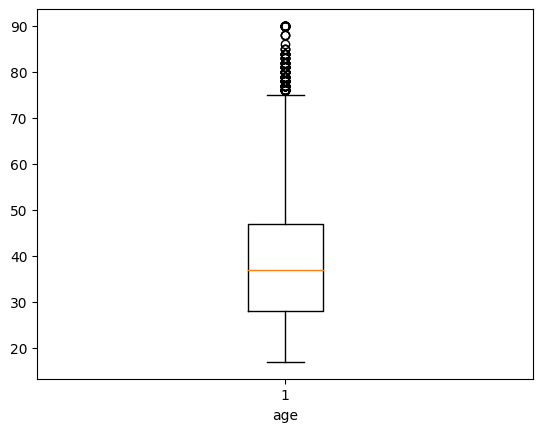

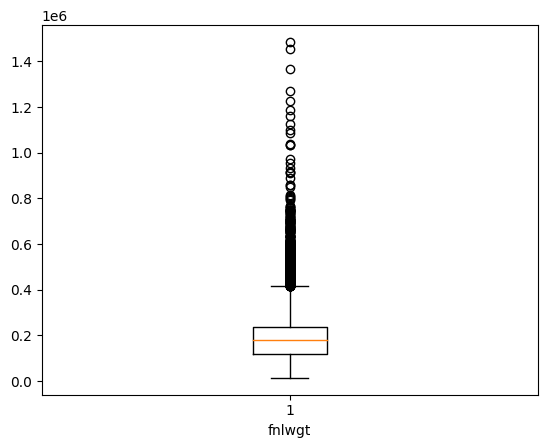

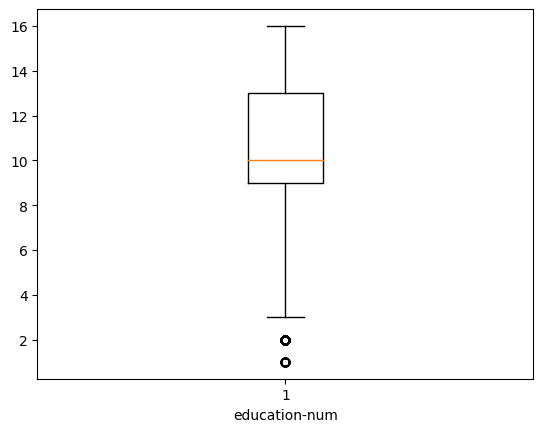

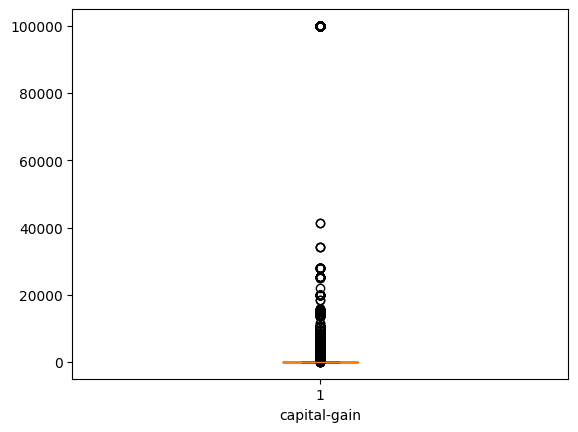

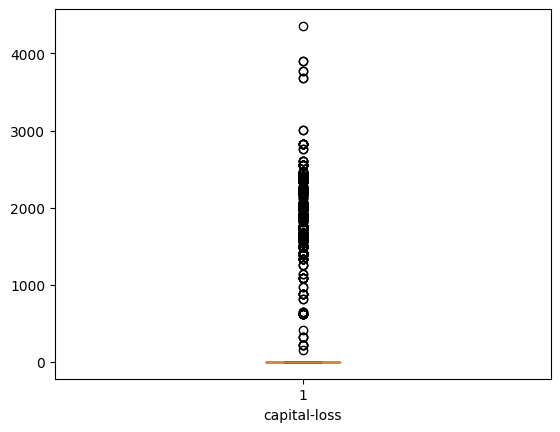

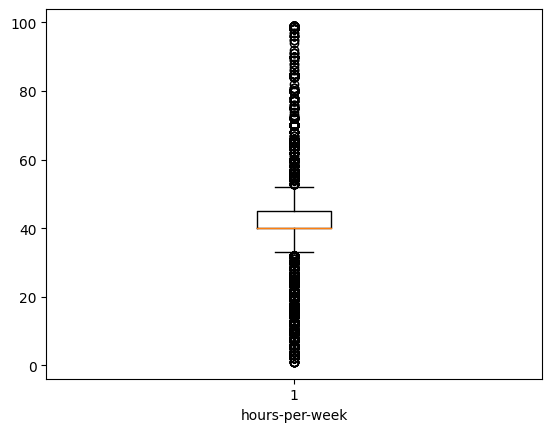

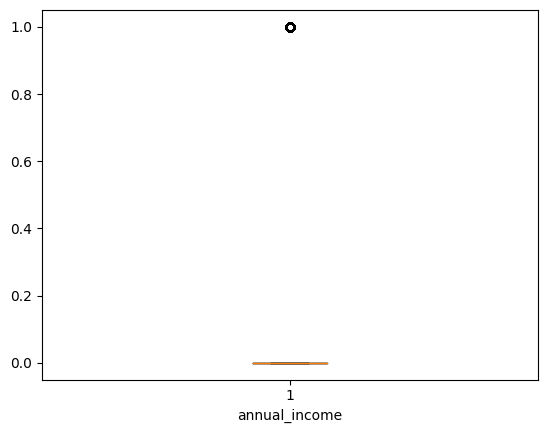

In [94]:
#outlier analysis
import matplotlib.pyplot as plt

for col_name in col:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel=("counts")
        plt.show()


# Removing the outliers

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [95]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
df = df[((df['age']>=Q1-1.5*IQR) & (df['age']<=Q3+1.5*IQR))]


Q1 = df['fnlwgt'].quantile(0.25)
Q3 = df['fnlwgt'].quantile(0.75)

IQR=Q3-Q1

df = df[((df['fnlwgt']>=Q1-1.5*IQR) & (df['fnlwgt']<=Q3+1.5*IQR))]

Q1 = df['education-num'].quantile(0.25)
Q3 = df['education-num'].quantile(0.75)

IQR = Q3-Q1

df = df[((df['education-num']>=Q1-1.5*IQR) & (df['education-num']<=Q3+1.5*IQR))]


Q1 = df['hours-per-week'].quantile(0.25)
Q3 = df['hours-per-week'].quantile(0.75)

IQR = Q3-Q1

df = df[((df['hours-per-week']>=Q1-1.5*IQR) & (df['hours-per-week']<=Q3+1.5*IQR))]




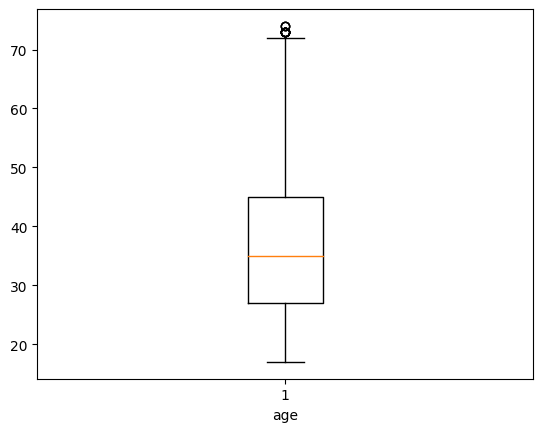

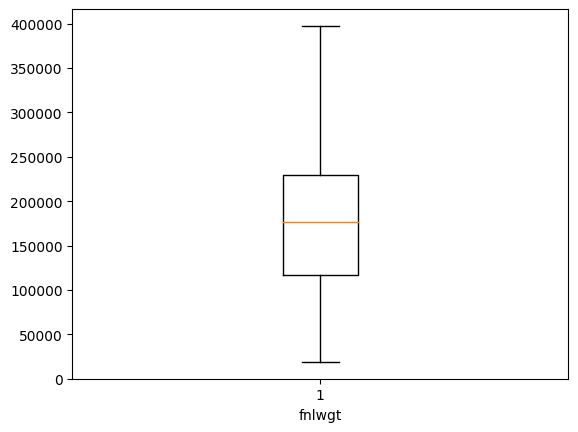

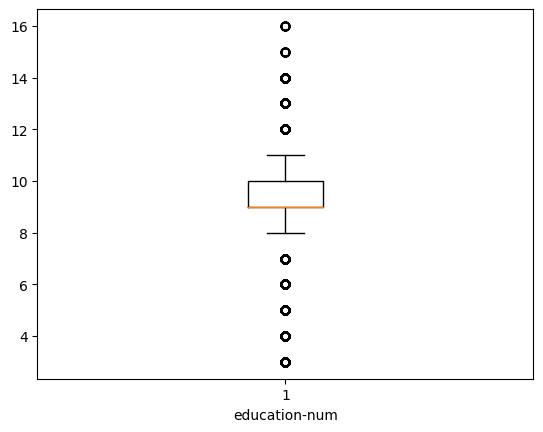

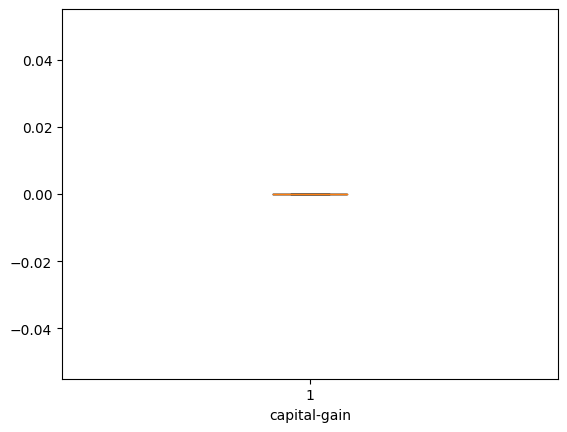

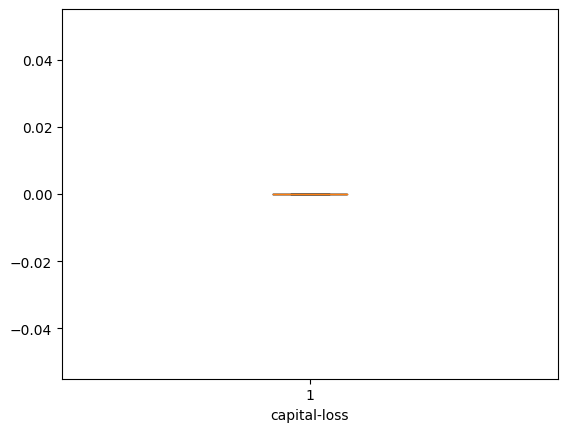

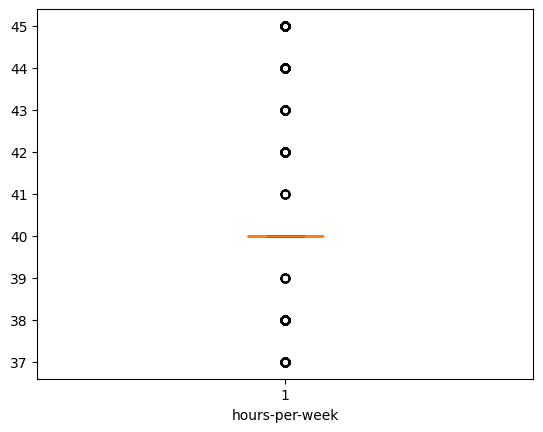

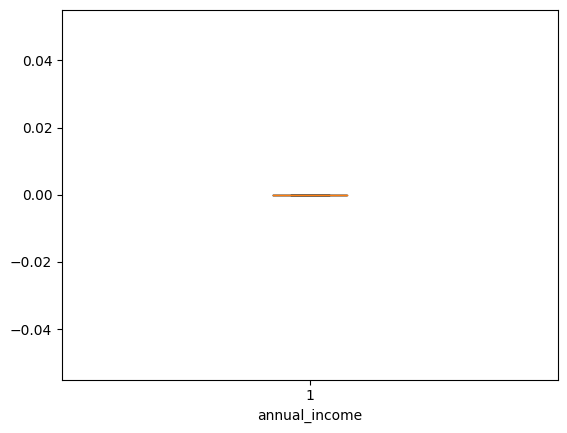

In [ ]:

for col_name in col:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel=("counts")
        plt.show()


In [96]:
#Label Encoding ---- for all object dtypes to convert to integer type

col_list=[]
for col in df.columns:
    if((df[col].dtypes=='object') &(col!='annual_income')):
        col_list.append(col)

In [ ]:
col_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [97]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

for i in col_list:
    df[i]=labelencoder.fit_transform(df[i])

In [ ]:
df.dtypes

age               int64
workclass         int64
fnlwgt            int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
annual_income     int64
dtype: object

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,5,0
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,38,0
7,52,4,209642,10,9,2,3,0,4,1,0,0,45,38,0


# Variance Inflation Factor(VIF)
is a method to detect multi collinearity between the independent features.



In [98]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!="object") & (col!='annual_income')): # only num cols expect target
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

           Feature        VIF
0              age  12.001426
1        workclass   6.186116
2           fnlwgt   5.176744
3        education  10.585285
4    education-num  21.158100
5   marital-status   3.929182
6       occupation   3.083475
7     relationship   2.585366
8             race  19.270425
9              sex   5.040800
10    capital-gain   1.041604
11    capital-loss   1.063146
12  hours-per-week  59.145880
13  native-country  22.137791


In [99]:
df=df.drop(['hours-per-week'],axis=1)

In [100]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!="object") & (col!='annual_income')): # only num cols expect target
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

           Feature        VIF
0              age  10.664272
1        workclass   6.032527
2           fnlwgt   5.002918
3        education  10.434066
4    education-num  18.883893
5   marital-status   3.800715
6       occupation   3.053996
7     relationship   2.481696
8             race  17.383748
9              sex   4.669714
10    capital-gain   1.041097
11    capital-loss   1.063048
12  native-country  20.044439


In [101]:
df = df.drop(["native-country"],axis=1)

In [102]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!="object") & (col!='annual_income')): # only num cols expect target
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

           Feature        VIF
0              age  10.114968
1        workclass   5.991756
2           fnlwgt   4.977703
3        education  10.203065
4    education-num  18.318671
5   marital-status   3.743760
6       occupation   3.050078
7     relationship   2.412712
8             race  15.086871
9              sex   4.600732
10    capital-gain   1.040035
11    capital-loss   1.062915


In [103]:
df = df.drop(["education-num"],axis=1)

In [104]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!="object") & (col!='annual_income')): # only num cols expect target
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

           Feature        VIF
0              age   9.532024
1        workclass   5.919974
2           fnlwgt   4.936409
3        education   8.228019
4   marital-status   3.670224
5       occupation   2.946675
6     relationship   2.399783
7             race  14.171139
8              sex   4.585816
9     capital-gain   1.033057
10    capital-loss   1.058412


In [105]:
df = df.drop(["race"],axis=1)

In [106]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!="object") & (col!='annual_income')): # only num cols expect target
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

          Feature       VIF
0             age  8.244642
1       workclass  5.707238
2          fnlwgt  4.780542
3       education  7.595151
4  marital-status  3.582585
5      occupation  2.918409
6    relationship  2.340863
7             sex  4.322125
8    capital-gain  1.032745
9    capital-loss  1.058261


In [107]:
df = df.drop(["age"],axis=1)

In [108]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!="object") & (col!='annual_income')): # only num cols expect target
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

          Feature       VIF
0       workclass  5.189213
1          fnlwgt  4.600399
2       education  6.603049
3  marital-status  3.578447
4      occupation  2.851137
5    relationship  2.321107
6             sex  4.112597
7    capital-gain  1.028498
8    capital-loss  1.054380


In [109]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21716 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   workclass       21716 non-null  int64
 1   fnlwgt          21716 non-null  int64
 2   education       21716 non-null  int64
 3   marital-status  21716 non-null  int64
 4   occupation      21716 non-null  int64
 5   relationship    21716 non-null  int64
 6   sex             21716 non-null  int64
 7   capital-gain    21716 non-null  int64
 8   capital-loss    21716 non-null  int64
 9   annual_income   21716 non-null  int64
dtypes: int64(10)
memory usage: 1.8 MB


In [111]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)

In [ ]:
x_train

,workclass,fnlwgt,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss
4452,3,86745,8,4,0,3,0,0,0
4386,0,174040,13,5,2,1,1,0,0
376,2,267404,10,2,2,5,0,0,0
6396,2,117767,13,4,5,3,1,0,0
18156,0,59932,8,4,9,1,0,0,0
...,...,...,...,...,...,...,...,...,...
15312,2,174704,1,4,7,1,1,0,0
16761,2,128485,7,2,2,0,1,0,0
864,2,80945,10,2,6,0,1,0,0
14858,0,352768,10,0,0,3,0,0,0


In [112]:
model.fit(x_train,y_train)

LogisticRegression()

In [113]:
y_pred=model.predict(x_test)

In [114]:
from sklearn.metrics import *
c1=confusion_matrix(y_test,y_pred)

In [115]:
c1


array([[3101,   97],
       [ 823,  323]])

In [ ]:
450/(179+450)
4639+450

5089

In [116]:
def report(actual,predictions):
    print("accuracy_score: ",accuracy_score(actual,predictions))
    print("r2_score: ",r2_score(actual,predictions))
    print("precision_score: ",precision_score(actual,predictions))

In [117]:
report(y_test,y_pred)

accuracy_score:  0.7882136279926335
r2_score:  -0.0904721209918502
precision_score:  0.7690476190476191


# Decision Tree

In [118]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
clf=DecisionTreeClassifier()

In [120]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [121]:
y_pred=clf.predict(x_test)

In [122]:
confusion_matrix(y_test,y_pred)

array([[2742,  456],
       [ 429,  717]])

In [123]:
report(y_test,y_pred)

accuracy_score:  0.7962707182320442
r2_score:  -0.04898676856281248
precision_score:  0.6112531969309463


# Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
Rclf=RandomForestClassifier()
Rclf.fit(x_train,y_train)

RandomForestClassifier()

In [125]:
y_pred=Rclf.predict(x_test)

In [126]:
report(y_test,y_pred)

accuracy_score:  0.8232044198895028
r2_score:  0.08969283812854245
precision_score:  0.6789772727272727


# `Hence, Random Forest is giving the most accuracy.`